In [9]:
# Copyright Tay Zhi Cong, year 2025

import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math

#### Appendix: Method to obtain low pass filter tap coeffiecients

In [10]:
def get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, filter_length):
    beta = signal.kaiser_beta(stop_band_attenuation) # 1. calculate the kaiser beta
    #filter_length = math.ceil((f_sampling/f_transition) * (stop_band_attenuation-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
    filter_tap = signal.windows.kaiser(filter_length, beta=beta)
    #print("estimated filter_length is", filter_length)
    h = np.sinc(2*f_minus_6db/f_sampling*np.linspace(-(filter_length - 1)/2,(filter_length - 1)/2,filter_length))*filter_tap
    h = h/sum(h)
    return h

def plot_filter_to_verify_spec(h, num_fft, f_sampling):
    freq_response = np.fft.fft(h, num_fft)
    freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

    plt.figure()
    ax = plt.subplot(1,2,1)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    ax.set_xlim(0, 50)
    ax.set_ylim(-80, 1)
    
    ax = plt.subplot(2,2,2)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    
    # Define the desired zoom region
    x_min, x_max = 3.5, 4.5
    y_min, y_max = -0.1, 0.1
    
    # Set the x and y limits of the axes to zoom to the rectangle
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    
    ax = plt.subplot(2,2,4)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    
    # Define the desired zoom region
    x_min, x_max = 5, 8
    y_min, y_max = -80, -50
    
    # Set the x and y limits of the axes to zoom to the rectangle
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


![6_3](img/6.3.png)

#### Designing a five path polyphase downsampling filter with the following spec:

Sample rate: 100kHz \
Pass band: 0 - 4kHz \
Stop band: 6 - 50kHz \
In-band ripple: 0.1dB \
Stop-band attennuation: 60dB


#### Step 1: Get the filter taps coefficients that meet the spec

/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_57919/833831394.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_57919/833831394.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
/var/folders/t4/f61pdd9x60nbtc7tlcsj1fs80000gn/T/ipykernel_57919/833831394.py:39: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')


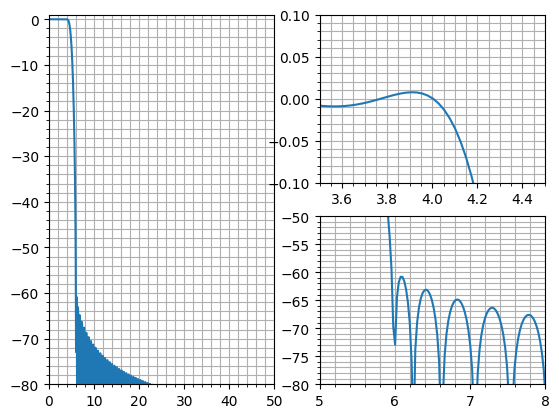

In [11]:
stop_band_attenuation = 60
f_sampling = 100
f_transition = 2
f_minus_6db = 5
low_pass_filter_length = 190 # use 93
num_fft = 1024*4

# h = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
# h = h/sum(h)
h = get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, low_pass_filter_length)
plot_filter_to_verify_spec(h, num_fft, f_sampling)


#### Step 2: Partition the filter tap coefficients to form a ten-path polyphase filter

(-5.0, 0.0)

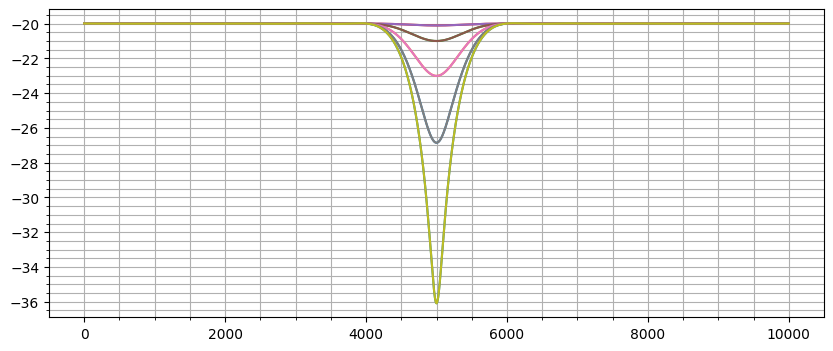

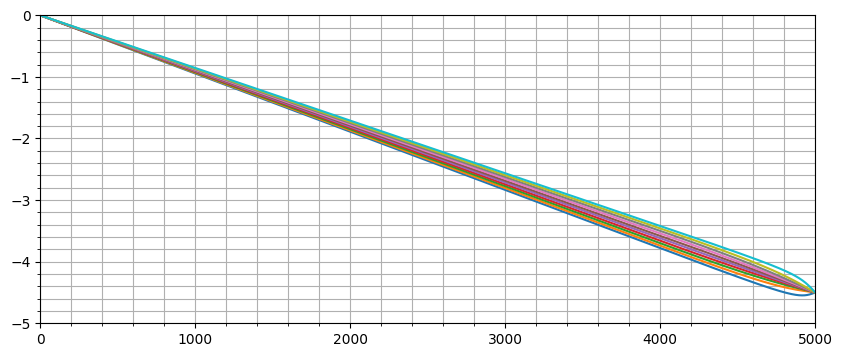

In [20]:
h_partitioned = np.reshape(h, (19, 10))

f_sampling = 10000
num_fft  = 1024 * 8
freq_response = np.fft.fft(h_partitioned[:,0], num_fft)
freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

plt.figure(figsize=(10, 4))
# ax = plt.subplot(2,1,1)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,1], num_fft))), 'C0')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,2], num_fft))), 'C1')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,3], num_fft))), 'C2')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,4], num_fft))), 'C3')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,5], num_fft))), 'C4')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,6], num_fft))), 'C5')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,7], num_fft))), 'C6')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,8], num_fft))), 'C7')
plt.plot(freq, 20 * np.log10(abs(np.fft.fft(h_partitioned[:,9], num_fft))), 'C8')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
# ax.set_xlim(0, 50)
# ax.set_ylim(-80, 1)

plt.figure(figsize=(10, 4))
# ax = plt.subplot(2,1,1)
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(freq_response)), 'C0')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,1], num_fft))), 'C1')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,2], num_fft))), 'C2')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,3], num_fft))), 'C3')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,4], num_fft))), 'C4')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,5], num_fft))), 'C5')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,6], num_fft))), 'C6')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,7], num_fft))), 'C7')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,8], num_fft))), 'C8')
plt.plot(freq, 1/(2*np.pi) * np.unwrap(np.angle(np.fft.fft(h_partitioned[:,9], num_fft))), 'C9')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
plt.xlim(0, 5000)
plt.ylim(-5, 0)